<a href="https://colab.research.google.com/github/vaskot1986/03MAIR--Algoritmos-de-Optimizacion--2020/blob/master/Arnau_Vazquez_Seminario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>

Nombre y Apellidos: Arnau Vazquez Giner<br>
Url Colab: https://colab.research.google.com/drive/1p3OVdfUuhuW2t81pi2EfPn6M-XrKoSJL?usp=sharing<br>
Url Github: https://github.com/vaskot1986/03MAIR--Algoritmos-de-Optimizacion--2020/blob/master/Arnau_Vazquez_Seminario.ipynb<br>

Problema:
>2. Organizar los horarios de partidos de La Liga<br>

Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la audiencia.

## **PROBABILIDADES**




**(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?**

**Respuesta**

Tenemos M horarios y N partidos (N*2 equipos). 
Si tuvieramos 1 partido solo, tendriamos M soluciones posibles, una solucion para cada horario. Con dos partidos tendriamos las soluciones anteriorores y para cada una de ellas, todas las combinaciones para el segundo partido, lo cual nos daría M^2. Con tres equipos, M^3 y así succesivamente...

**Si calculamos las posibilidades de esta forma, tenemos que el posible espacio de soluciones es de M^N. Como tenemos M=10 horarios y N=10 partidos, no sale un total de 10^10 combinaciones (10.000.000.000).**

*Este calculo se basa en tratar cada partido como único. Esto significa que Barça-Madrid(A-A) y Valencia-Sevilla(A-A) se tratan como dos partidos diferentes y por lo tanto, por ejemplo la solucion [barça-madrid (s20) y valencia-sevilla(d20)] no es la misma que [valencia-sevilla(s20) y barça-madrid (d20)]

**¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones?**

**Respuesta**

He intentado encontrar una fórmula matemática para encontrar el numero de soluciones una vez aplicada la restricción de que solo son válidas las combinaciones donde siempre haya como mínimo un partido los viernes y uno los lunes.
Lamentablemente no he sido capaz de encontrar ninuguna de exacta yo mismo ni ningun recurso online que me siriviera. Lo que si que he hecho ha sido utilizar mi algoritmo de fuerza bruta y ver (hasta N=9 partidos, ya que mas no se puede), una vez aplicada la restricción, como se reduce en porcentage el numero de soluciones para cada N, desde 1 a 9, dejando fijo el número de horarios (M=10).

El resultado se muestra en la tabla siguiente, donde podemos ver que el espacio de soluciones se reduce considerablemente, sobretodo a medida que N va decreciendo.

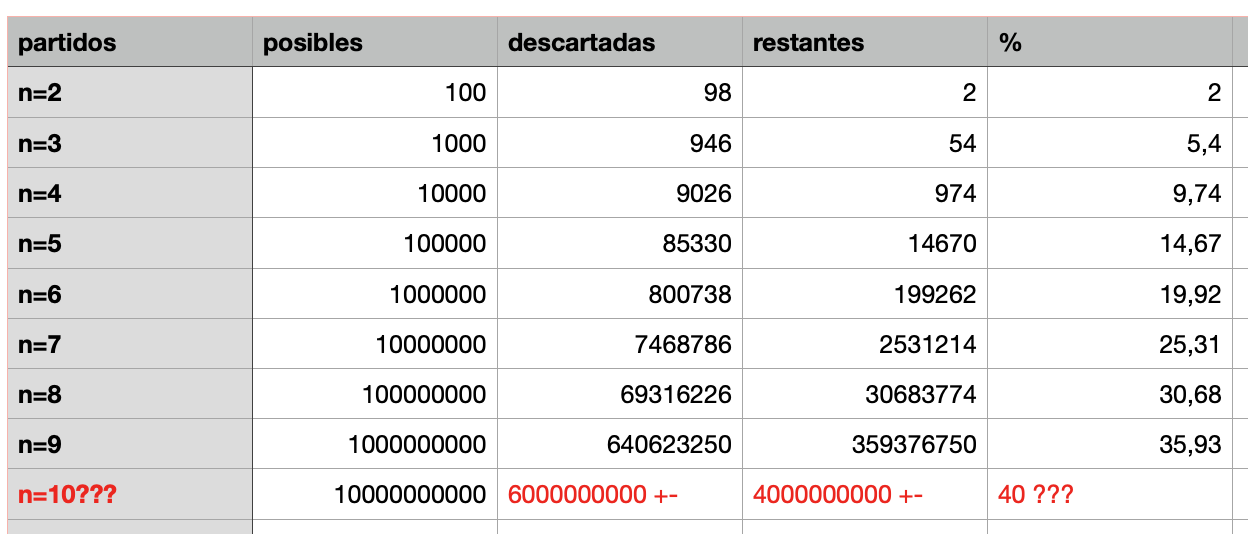

Con la tabla de resultados y viendo que a partir de n=3 el porcentage de soluciones se va incerementando un con un 5% del total he hecho una formula casera (que solo sirve para M=10) para obtener un valor aproximado del espacio de soluciones para N=10 partidos 11,12...

**La formula (casera y aproximada para M=10 y a válida para N>2) seria la siguiente:**

**Soluciones_con_restriccion_10_horarios(N) = (10^N) * (5*(N-2))/100**

**Soluciones_con_restriccion_10_horarios(10) = 10000000000 * 0.4 = 4.000.000.000**

**Por lo tanto para 10 partidos nuestro espacio de soluciones restringido seria aproximadamente de 4 mil millones de possibilidades.** 
Para 11 partidos seria de 45 mil millones, para 12 partidos 50 mil millones...



## **MODELO PARA EL ESPACIO DE SOLUCIONES**


**(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)**

**Respuesta**

Para la solucion he utilizado una lista(1) de listas(2)
Cada posicion de la lista(1) corresponde a una franja horaria y las sublistas(2) contienen los partidos para ese horario.
La longitud de la lista es por lo tanto la longitud del array de coefs horarios

Ejemplo:

La lista se puede inicializar en python con:

solucion = [[] for _ in range(len(coefs_reduccion_horario))]

**Solucion_ejemplo=[["AA","BC"],["AB"],[],["BB","CC","AA"]]**

**El ejemplo seria una version simplificada con 4 horarios, 2 partidos en la primera franja, 1 en la segunda, 0 la tercera y 3 en la cuarta**

<br>
*Para el resto de datos del enunciado he utilizado listas:<br>
Diccionario con las audiencias máximas segun el enfrentamiento (en millones de personas)<br>
<b>audiencia_max = {"AA": 2,<br>
                 "AB": 1.3, <br>
                 "AC": 1, <br>
                 "BB": 0.9,<br>
                 "BC": 0.75,<br>
                 "CC": 0.47}<br></b>

Coeficientes de reduccion debido a la simultaneidad (directamente usamos el complementario para simplemente multiplicar)<br>
coefs_reduccion_simultaneidad[0]=ningun partido simultaneo(audiencia = audiencia*1)<br>
coefs_reduccion_simultaneidad[8]=8 partidos simultaneos (audiencia = audiencia*0.2)<br>
coefs_reduccion_simultaneidad=[1,0.75,0.65,0.4,0.3,0.25,0.22,0.2,0.2]<br>

Vector con los coeficientes de reduccion de audiencia debido al horario<br>
coefs_reduccion_horario[0]=viernes 20h<br>
coefs_reduccion_horario[9]=lunes 20h<br>
<b>coefs_reduccion_horario = [0.4,<br>
                           0.55,0.7,0.8,1,<br>
                           0.45,0.75,0.5,1,<br>
                           0.4]</b><br>

Lista partidos<br>
Es la lista de los partidos de la jornada, esto es solo el objeto utilizado para la entrada, no el objeto para la solucion<br>
<b>lista_partidos=["AB","AB","AB","BB","BB","BB","BC","BC","CC","CC"]</b>

In [ ]:
#Flag que si se deja en true hara un print con un poco de informacion extra
DEBUG=True

#Diccionario con las audiencias máximas segun el enfrentamiento (en millones de personas)
audiencia_max = {"AA": 2,
                 "AB": 1.3,
                 "BA": 1.3, 
                 "AC": 1, 
                 "CA": 1,
                 "BB": 0.9,
                 "BC": 0.75,
                 "CB": 0.75,
                 "CC": 0.47}

#Coeficientes de reduccion debido a la simultaneidad (directamente usamos el complementario para simplemente multiplicar)
#coefs_reduccion_simultaneidad[0]=ningun partido simultaneo(audiencia = audiencia*1)
#coefs_reduccion_simultaneidad[8]=8 partidos simultaneos (audiencia = audiencia*0.2)
coefs_reduccion_simultaneidad=[1,0.75,0.65,0.4,0.3,0.25,0.22,0.2,0.2]

#Vector con los coeficientes de reduccion de audiencia debido al horario 
#coefs_reduccion_horario[0]=viernes 20h
#coefs_reduccion_horario[9]=lunes 20h
coefs_reduccion_horario = [0.4,
                           0.55,0.7,0.8,1,
                           0.45,0.75,0.5,1,
                           0.4]

#Lista partidos
#Es la lista de los partidos de la jornada
lista_partidos=["AB","AB","AB","BB","BB","BB","BC","BC","CC","CC"]

#Solucion
#La solucion la guardamos una lista(1) de sublistas(2)
#Cada posicion de la lista(1) corresponde a una franja horaria y las sublistas(2) contienen los partidos para ese horario.
#La longitud de la lista es por lo tanto la longitud del array de coefs horarios
#Ejemplo:
#  Solucion_ejemplo=[["AA","BC"],["AB"],[],["BB","CC","AA"]]
#El ejemplo seria una version simplificada con 4 horarios, 2 partidos la primera franja, 1 la segunda, 0 la tercera y 3 la cuarta
solucion = [[] for _ in range(len(coefs_reduccion_horario))]

if(DEBUG):
  print("Audiencia maxima:                     ",audiencia_max)
  print("Coeficientes reduccion simultaneidad: ",coefs_reduccion_simultaneidad)
  print("Coeficientes reduccion horario:       ",coefs_reduccion_horario)
  print("Solucion(solo inicializada):          ",solucion)

Audiencia maxima:                      {'AA': 2, 'AB': 1.3, 'BA': 1.3, 'AC': 1, 'CA': 1, 'BB': 0.9, 'BC': 0.75, 'CB': 0.75, 'CC': 0.47}
Coeficientes reduccion simultaneidad:  [1, 0.75, 0.65, 0.4, 0.3, 0.25, 0.22, 0.2, 0.2]
Coeficientes reduccion horario:        [0.4, 0.55, 0.7, 0.8, 1, 0.45, 0.75, 0.5, 1, 0.4]
Solucion(solo inicializada):           [[], [], [], [], [], [], [], [], [], []]


**Según el modelo para el espacio de soluciones<br>**
**(*)¿Cual es la función objetivo?**

**Respuesta**

$audiencia\_maxima\_posible=MAX_{solucion=0}^{M^N}(\sum_{franja=0}^{M} [\sum_{partido=0}^{n\_partidos\_franja_{franja}}audiencia\_max_{partido} * cofs\_reduccion\_simultaneidad_{n\_partidos\_franja_{franja}} * cofs\_reduccion\_horaria_{franja}])$

Donde:

**$M$** numero de franjas horarias<br>
**$N$** numero de partidos<br>
**$n\_partidos\_franja_{franja}$** numero de partidos de la solucion de la iteracion para una determinada franja (franja)<br>
$audiencia\_max$ lista con los valores de audiencia maximos para cada tipo de partido<br>
**$cofs\_reduccion\_simultaneidad_{n\_partidos\_franja_{franja}}$** coeficiente de reduccion de la simultaneidad dependiendo del numero de partidos en la franja<br>
**$cofs\_reduccion\_horaria_{franja}$** coeficiente de reduccion para la franja horaria<br>

Puede que la formula sea un poco ilegible. A continuacion, hay el codigo para calcular la audiencia a partir de una solucion. Básicamente en el codigo se aplica la formula anterior (la parte de los sumatorios). 
Para encontrar el máximo possible (segun la formula) habría que iterar sobre todas las soluciones y quedarse con el máximo, lo que vendría a ser fuerza bruta.

In [ ]:
#Funcion para el cálculo de la audiencia
#Esta testeada con el ejemplo de las diapositivas del seminario. Como observación, comentar que en la tabla de los resultados de ejemplo, hay un error. 
#El error esta en el partido del domingo a las 18 (Espanol-Sevilla) que en el enunciado pone que esa franja horaria se pondera con 0.5 pero en la 
#tabla del resultado, esta ponderada con 0.85. 
#A parte de eso la tabla del resultado esta redondeada a dos decimales. El resultado en las diapositivas es de 5.88 pero el resultado correcto para 
#esa configuración, serian 5.562125 millones de espectadores)

def calculo_audiencia(audiencia_max,coefs_reduccion_simultaneidad,coefs_reduccion_horario,solucion):
  audiencia_total = 0
  for idx_franja,partidos_franja in enumerate(solucion):
    n_partidos=len(partidos_franja)
    #print(partidos_franja)
    for partido in partidos_franja:
      audiencia_partido=audiencia_max[partido]*coefs_reduccion_simultaneidad[n_partidos-1]*coefs_reduccion_horario[idx_franja]
      #print(audiencia_max[partido])
      #print(coefs_reduccion_simultaneidad[n_partidos-1])
      #print(coefs_reduccion_horario[idx_franja])
      #print("    ",audiencia_partido)
      audiencia_total+=audiencia_partido

  return audiencia_total

#En caso que se quiera probar la configuracion del ejemplo de las diapositivas, basta con descomentar las dos lineas de codigo que siguen 
#(tener en cuenta el error comentado al inicio de la celda!)
#solucion=[["AB"],["AB"],["CC"],["AB"],["CC"],[],["BC","BB"],["BB"],["BC"],["BB"]]
#print(calculo_audiencia(audiencia_max,coefs_reduccion_simultaneidad,coefs_reduccion_horario,solucion))

**(*)¿Es un problema de maximización o minimización?**

**Respuesta**

Como se pide conseguir la audiencia máxima es un problema de <b>Maximización</b>

## **RESOLUCION POR FUERZA BRUTA**

**Diseña un algoritmo para resolver el problema por fuerza bruta**


**Respuesta**

A continuación se presenta el código para resolver el problema por fuerza bruta. Se puede probar en un tiempo razonable con máximo 7 partidos. Para más partidos el tiempo de ejecución es demasiado grande. El algoritmo funciona correctamente ya que lo he testeado con pocos partidos y las soluciones eran las esperadas por lógica.

El algoritmo usa el modelo de datos presentado anteriormente y tambien usa la funcion $calculo\_audiencia()$ para calcular la audiencia de cada posible solución.

Para pasar a la siguiente solución, se ha implementado un contador dentro de la misma funcion que va incrementandose en cada iteración del $while$.

El número de iteraciones es $M^N$. (M=numero de franjas horarias, N= numero de partidos)

La función $transformar\_solucion$ lo que hace es recibir la lista de partidos de entrada y el la lista con la franja de cada partido y los pone en el formato lista de listas que se pasa a la funcion $calculo\_audiencia$


In [ ]:
#fuerza bruta
#para realizar el algoritmo por fuerza bruta nos podemos imaginar una tabla, en el eje horizontal van los horarios y en el eje vertical
#los partidos de la lista_partidos. Con el gráfico siguiente es fácil de entender como se van realizando las iteraciones....

#### Iteracion 1 #######
#        jueves|viernes|sabado
#partido1   1  |   0   |  0     pos_partidos[0]=0
#partido2   1  |   0   |  0     pos_partidos[1]=0
#partido3   1  |   0   |  0     pos_partidos[2]=0

#### Iteracion 2 #######
#        jueves|viernes|sabado
#partido1   0  |   1   |  0     pos_partidos[0]=1
#partido2   1  |   0   |  0     pos_partidos[1]=0
#partido3   1  |   0   |  0     pos_partidos[2]=0

#### Iteracion 3 #######
#        jueves|viernes|sabado
#partido1   0  |   0   |  1     pos_partidos[0]=2
#partido2   1  |   0   |  0     pos_partidos[1]=0
#partido3   1  |   0   |  0     pos_partidos[2]=0

#### Iteracion 4 #######
#        jueves|viernes|sabado
#partido1   1  |   0   |  0     pos_partidos[0]=0
#partido2   0  |   1   |  0     pos_partidos[1]=1
#partido3   1  |   0   |  0     pos_partidos[2]=0

#......

#### Iteracion M^N ####### (donde M es el numero de franjas horarias y N el numero de partidos)
#        jueves|viernes|sabado
#partido1   0  |   0   |  1     pos_partidos[0]=2
#partido2   0  |   0   |  1     pos_partidos[1]=2
#partido3   0  |   0   |  1     pos_partidos[2]=2


#Para cada iteracion miraremos la audiencia y si es mayor que el máximo encontrado hasta ahora lo subistituiremos
#Por otra parte, como el enunciado dice que viernes y lunes deben tener un partido, descartaremos directamente cualquier
#solucion donde no haya partidos el viernes y el lunes, lo que reduce muchisimo las soluciones a calcular. 
import numpy as np

def transformar_solucion(pos_partidos,lista_partidos,coefs_reduccion_horario):
  n_horarios = len(coefs_reduccion_horario)
  solucion = [[] for _ in range(n_horarios)]
  for idx,pos_partido in enumerate(pos_partidos):
    solucion[int(pos_partido)].append(lista_partidos[idx])
  return solucion

def busqueda_fuerza_bruta(audiencia_max,coefs_reduccion_simultaneidad,coefs_reduccion_horario,lista_partidos):
  mejor_audiencia = 0 
  pos_partidos=np.zeros(len(lista_partidos))
  n_partidos=len(lista_partidos)
  n_horarios=len(coefs_reduccion_horario)
  mejor_solucion = [[] for _ in range(n_horarios)]
  max=n_horarios**n_partidos
  count=0
  while(count<max-1):
    #el contador funciona como un cuenta kilometros analógico. Cada vez que una cifra llega al maximo (9 en nuestro caso), 
    #se incrementa en 1 la siguiente cifra y la actual y anteriores, se ponen en 0.
    if(pos_partidos[0]==n_horarios-1):
      found=False;
      count2=1
      while(found==False):
        if(pos_partidos[count2]<n_horarios-1):
          pos_partidos[count2]+=1
          pos_partidos[0:count2]=0
          found=True
        count2+=1
    else:
      pos_partidos[0]+=1
    #solo miraremos aquellas combinaciones donde el horario 0 y el horario n no esten vacías
    if (len(np.where(pos_partidos == 0)[0])>0 and len(np.where(pos_partidos == n_horarios-1)[0])>0):
      #transformamos la solucion
      solucion = transformar_solucion(pos_partidos,lista_partidos,coefs_reduccion_horario)
      #calculamos la audiencia de esa solucion
      audiencia_solucion = calculo_audiencia(audiencia_max,coefs_reduccion_simultaneidad,coefs_reduccion_horario,solucion)
      if(audiencia_solucion > mejor_audiencia):
        mejor_audiencia = audiencia_solucion
        mejor_solucion = solucion
    count+=1
  return mejor_solucion,copy.deepcopy(mejor_audiencia)
   
        
#lista_partidos=["BA","BB","BB","AA","CC"]
#lista_partidos=['CC', 'BB', 'CC', 'AB']
#busqueda_fuerza_bruta(audiencia_max,coefs_reduccion_simultaneidad,coefs_reduccion_horario,lista_partidos)     

**Calcula la complejidad del algoritmo por fuerza bruta**

**Respuesta**

En cuanto al cálculo de la complejidad, el algoritmo por fuerza bruta tiene que hacer M^N iteraciones por lo tanto en notación big O diriamos que:

$O(C^n)$

Donde C seria constante (el numero de franjas horarias) y n sería el número de partidos.

Notar que aunque se descarten soluciones, hay que iterar a traves de ellas igualmente asi que el número de iteraciones no baja. Los pasos concretos para cada iteración no se han tenido en cuenta ya que para la complejidad dejamos el orden más grande que en este caso es el exponencial.

## **ALOGORITMO ALTERNATIVO**

**(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta**

He diseñado un algoritmo basandome en la programacion dinámica. Lo que hace el algoritmo es coger la lista de partidos presentada y los ordena de mayor a menor audiencia.
El algoritmo parte de un objeto solución vacío y hace lo siguiente:
1-Ordenar la lista de partidos de mayor a menor audiencia
2-Empieza a iterar por el primer partido:
  Partido 1:
   - Pone el partido en la primera franja horaria de la solucion y calcula la audiencia, luego en la segunda y vuelve a calcular y asi sucesivamente. EL partido se queda en la franja donde la audiencia ha resultado ser mayor.
  Partido 2:
  - Partiendo de la solucion, que ahora contiene el partido 1, realizamos los mismos pasos para el partido 2. Despues de esta iteracion nuestro objeto solucion contendra 2 partidos ya.
  Partido n: 
  - Lo mismo que en la las primeras itearaciones. Al acabar esta iteracion, nuestro objeto solucion contendra ya todos los partidos.
3-En este punto tenemos la solución optima pero sin las restricciones.
4-Aplicamos la restriccion 1, para ello miramos si el horario del viernes esta vacío. Si esta vacío, recorremos nuestra lista de soluciones y para cada partido, lo movemos al horario del viernes y calculamos la audiencia. Dejaremos el partido que menos reduzca la audiencia.
5-Aplicamos la restriccion 2 partiendo de la solucion de la restriccion 1. Haremos lo mismo, pero teniendo en cuenta que el partido del viernes, lo tenemos que dejar tal y como esta.

La solución es infinitamente mejor que el algoritmo por fuerza bruta ya que prácticamente la complejidad es NxM (multiplicado por los pasos claro...).

**Respuesta**

In [ ]:
import copy

def ordenar_lista_partidos(lista_partidos,audiencia_max):
    for i,partido in enumerate(lista_partidos):
      max = audiencia_max[lista_partidos[i]]
      for j in range(i+1,len(lista_partidos)):
        #print("aud:",audiencia_max[lista_partidos[j]])
        #print("max",max)
        if(audiencia_max[lista_partidos[j]] > max):
          max = audiencia_max[lista_partidos[j]]
          aux = lista_partidos[i]  
          lista_partidos[i] = lista_partidos[j]
          lista_partidos[j] = aux
    return lista_partidos


def aplica_restriccion_viernes(audiencia_max,coefs_reduccion_simultaneidad,coefs_reduccion_horario,solucion):
  #basicamente en esta funcion lo que haremos sera coger la solucion obtenida y mirar si los horarios viernes y lunes, estan llenos, si no lo estan,
  #buscaremos qué partido sacaremos de su posicion actual para ponerlo en el viernes solucion[0] o el domingo solucion [n_horarios-1]. 
  if(len(solucion[0])!=0):
    return solucion  

  audiencia_maxima = 0
  for id_h in range(1,len(solucion)):
    for id_p in range(len(solucion[id_h])):
        solucion[0]=[solucion[id_h][id_p]]
        solucion[id_h].pop(id_p)
        audiencia_solucion = calculo_audiencia(audiencia_max,coefs_reduccion_simultaneidad,coefs_reduccion_horario,solucion)
        if(audiencia_solucion > audiencia_maxima or audiencia_maxima == 0):
          audiencia_maxima = audiencia_solucion
          solucion_max = copy.deepcopy(solucion)
        solucion[id_h].append(solucion[0][0])
        solucion[0].pop()
  return solucion_max

def aplica_restriccion_domingo(audiencia_max,coefs_reduccion_simultaneidad,coefs_reduccion_horario,solucion):
  #basicamente en esta funcion lo que haremos sera coger la solucion obtenida y mirar si los horarios viernes y lunes, estan llenos, si no lo estan,
  #buscaremos qué partido sacaremos de su posicion actual para ponerlo en el viernes solucion[0] o el domingo solucion [n_horarios-1]. 
  if(len(solucion[-1])!=0):
    return solucion

  audiencia_maxima = 0
  for id_h in range(1,len(solucion)-1):
    for id_p in range(len(solucion[id_h])):
        solucion[len(solucion)-1]=[solucion[id_h][id_p]]
        solucion[id_h].pop(id_p)
        audiencia_solucion = calculo_audiencia(audiencia_max,coefs_reduccion_simultaneidad,coefs_reduccion_horario,solucion)
        if(audiencia_solucion > audiencia_maxima or audiencia_maxima == 0):
          audiencia_maxima = audiencia_solucion
          solucion_max = copy.deepcopy(solucion)
        solucion[id_h].append(solucion[len(solucion)-1][0])
        solucion[len(solucion)-1].pop()
  return solucion_max

def dinamic_prog(audiencia_max,coefs_reduccion_simultaneidad,coefs_reduccion_horario,lista_partidos):
  lista_partidos = ordenar_lista_partidos(lista_partidos,audiencia_max)
  n_horarios=len(coefs_reduccion_horario)
  solucion = [[] for _ in range(len(coefs_reduccion_horario))]
  for partido in range(len(lista_partidos)):
    audiencia_maxima = 0
    solucion_max = solucion
    for horario in range(n_horarios):
      solucion[horario].append(lista_partidos[partido])
      audiencia_solucion = calculo_audiencia(audiencia_max,coefs_reduccion_simultaneidad,coefs_reduccion_horario,solucion)
      if(audiencia_solucion > audiencia_maxima):
        audiencia_maxima = audiencia_solucion
        solucion_max = copy.deepcopy(solucion)
      solucion[horario].pop()
    solucion=copy.deepcopy(solucion_max)
  ##partiendo de la mejor solucion, ahora hay que aplicar las restricciones
  solucion_con_restriccion_v = aplica_restriccion_viernes(audiencia_max,coefs_reduccion_simultaneidad,coefs_reduccion_horario,solucion_max)
  solucion_con_restriccion_v_y_d = aplica_restriccion_domingo(audiencia_max,coefs_reduccion_simultaneidad,coefs_reduccion_horario,solucion_con_restriccion_v)
  return solucion_con_restriccion_v_y_d,calculo_audiencia(audiencia_max,coefs_reduccion_simultaneidad,coefs_reduccion_horario,solucion_con_restriccion_v_y_d)



**(*)Calcula la complejidad del algoritmo**

**Respuesta**

La complejidad en Big O notation sería $O(n)$.

si N(partidos) y M(horarios) son iguales podriamos decir que seria n^2 pero realmente si hablamos solo de los partidos es $O(n)$.

## **PRUEBA CON DATOS ALEATORIOS**

**Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios**

**Respuesta**

In [ ]:
#La funcion creada devuelve una lista de partidos aleatoria. N es el numero de partidos y categorías es el vector de categorias.
#El vector de categorias es importante dejarlo como esta puesto que para el problema planteado solo tenemos valores para combinaciones
#de categorias A,B y C
import random

def crear_lista_partidos(N,categorias):
  equipos = [[] for _ in range(N*2)]
  lista_partidos = [[] for _ in range(N)]
  #asignamos aleatoriamente una categoria a cada equipo de entre las 3 disponibles, habra (N*2) equipos
  equipos = [random.choice(categorias) for x in equipos]

  #ahora emparejamos cada par de equipos N i N+1
  for i in range(0,(N*2),2):
    lista_partidos[i//2]=equipos[i]+equipos[i+1]

  return lista_partidos

#categorias=["A","B","C"]
#N=10
#crear_lista_partidos(N,categorias)

**Aplica el algoritmo al juego de datos generado**

**Respuesta**

En este apartado jugaremos un poco con los dos algoritmos creados. 

Se haran varios tests con Ns mas pequeñas donde compararemos el resultado y veremos que coinciden siempre.

**Se mostrara el resultado para N=10 partidos (solo posible con el algoritmo alternativo) con la combinacion de las diapositivas del seminario**



In [ ]:
#Este pequeño test compara la audiencia máxima encontrada por ambos algoritmos y da error si es diferente.
#Se prueban combinaciones de 2 partidos (minimo teniendo en cuenta las restricciones) hasta 6 partidos.
#El algoritmo de fuerza bruta empieza a tardar demasiado... 

def test_algoritmos():
  categorias=["A","B","C"]
  for i in range(2,7):
    print("Probando con N=",i, " partidos") 
    N=i
    for i in range(10):
      lista_partidos = crear_lista_partidos(N,categorias)
      sol_1,aud_sol_1 = dinamic_prog(audiencia_max,coefs_reduccion_simultaneidad,coefs_reduccion_horario,lista_partidos)
      sol_2,aud_sol_2 = busqueda_fuerza_bruta(audiencia_max,coefs_reduccion_simultaneidad,coefs_reduccion_horario,lista_partidos)
      if(abs(aud_sol_1 - aud_sol_2) > 0.000001):
        print("Las audiencia no coincide!!!")
        print("Lista partidos conflictiva",lista_partidos)
        return "Test fallido"
  return "Test passado correctamente"

test_algoritmos()

Probando con N= 2  partidos
Probando con N= 3  partidos
Probando con N= 4  partidos
Probando con N= 5  partidos
Probando con N= 6  partidos


'Test passado correctamente'

In [ ]:
###Para N=10 partidos probamos solo el algoritmo alternativo y lo probamos con la jornada que se nos da de ejemplo 
lista_partidos_enunciado_seminario=["BA","BA","CC","BA","CC","BC","BB","BB","BC","BB"]
sol_1,aud_sol_1 = dinamic_prog(audiencia_max,coefs_reduccion_simultaneidad,coefs_reduccion_horario,lista_partidos_enunciado_seminario)
print("La solucion es: ",sol_1)
print("La audiencia máxima posible para la jornada del encunciado es de: ",aud_sol_1," millones de espectadores")

La solucion es:  [['CC'], ['BB'], ['BB'], ['BA'], ['BA'], ['BC'], ['BB'], ['BC'], ['BA'], ['CC']]
La audiencia máxima posible para la jornada del encunciado es de:  6.5285  millones de espectadores


## **OTRAS OPCIONES**

**Describe brevemente las lineas de como crees que es posible avanzar en el 
estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño**

**Respuesta**

La resolucion por el método alternativo sería quizás programación dinámica ya que vamos resolviendo el problema cogiendo el resultado de un problema más pequeño (añadimos partidos de 1 en 1). Luego con las restricciones, ya cambia un poco así que seria una mezcla.

El tiempo de ejecución y los pasos son buenos y realmente no habría problemas si creciera la N (partidos) o la M (horarios).

Como se puede ver, he testeado con diferentes Ns y para cada una diferentes combinaciones. Aun así, no sabría demostrar si mi algoritmo es correcto para todos los casos, especialmente para Ns mayores, las cuales no permiten comprobar el resultado comparandolo con fuerza bruta que sí sabemos que es 100% optimo.

Visto lo visto intuyo que el algoritmo es correcto.

Como alternativas, se podrían usar algoritmos metaehuristicos, por ejemplo el simulated annealing, seguramente encontraríamos soluciones buenas pero no estoy seguro que podamos afirmar que sería la mejor.

## **REFERENCIAS**

Como referencias relamente no he usado ninguna referencia online. He utilizado solo lo aprendido en clase. 
Para calcular matematicamente las posibles soluciones quitando las restricciones he buscado online algun recurso pero no he encontrado nada conveniente asi que he acabado haciendo el gráfico que se ve en el apartado y aportando mi formula aproxiamada.